In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
import numpy as np
from scipy.signal import find_peaks, butter, filtfilt

(1383364, 2)
2025-05-02 03:58:59.622000
2025-05-02 05:59:02.048000
(320759, 2)


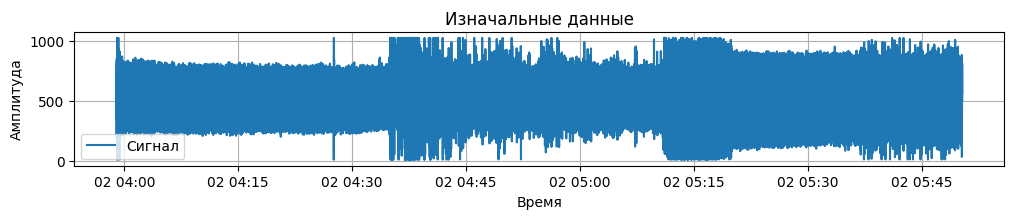

In [54]:
# Загрузка данных
data = pd.read_csv('com_data/com_data_20250502_035859_619.csv')
print(data.shape)
data.head()

# Копирование данных и преобразование времени
data = data.copy()
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
print(data['Timestamp'].min())
print(data['Timestamp'].max())

# Фильтрация данных по временному диапазону
filtered_data = data[(data['Timestamp'] > '2025-05-02 03:59:00') & 
                    (data['Timestamp'] < '2025-05-02 05:50:20')]
filtered_data = filtered_data[0::4].reset_index(drop=True)
print(filtered_data.shape)

# Визуализация исходных данных
x = filtered_data['Timestamp']
y = filtered_data['COM_Data']

plt.figure(figsize=(12, 8))
plt.subplot(414)
plt.plot(x, y, label="Сигнал")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.title("Изначальные данные")
plt.legend()
plt.grid(True)
plt.show()

# Декомпозиция данных

In [55]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=10)
filtered_data['COM_Data'] = decomposition.resid

# Определение пиков

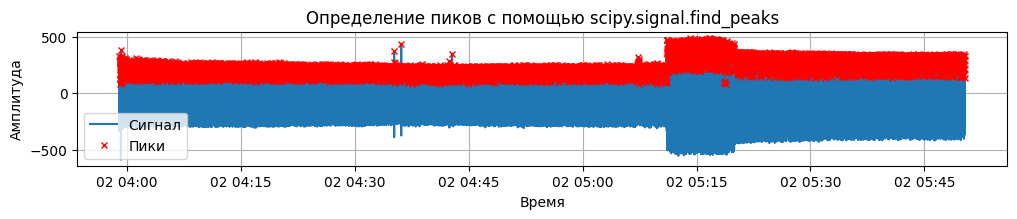

In [56]:
x = filtered_data['Timestamp']
y = filtered_data['COM_Data']


peaks, _ = find_peaks(y, height=80, distance=10, prominence=100)


# Визуализация с пиками
plt.figure(figsize=(12, 8))
plt.subplot(414)
plt.plot(x, y, label="Сигнал")
plt.plot(x[peaks], y[peaks], "x", color='red', label="Пики", markersize=5)
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.title("Определение пиков с помощью scipy.signal.find_peaks")
plt.legend()
plt.grid(True)
plt.show()


# Выявление аномалий

In [ ]:
print(x[peaks])
for i in range(len(x[peaks]) - 1):
    time = pd.to_datetime(x[peaks].values)
    interval = (time[i + 1] - time[i]).microseconds / 1000000
    
    # Условие для корректных интервалов (40-150 ударов/с)
    if not (0.4 < interval < 1.5):
        filtered_data.loc[(filtered_data['Timestamp'] > time[i]) & 
                         (filtered_data['Timestamp'] < time[i + 1]), 
                         ['COM_Data']] = None

20       2025-05-02 03:59:00.418
57       2025-05-02 03:59:01.189
88       2025-05-02 03:59:01.835
120      2025-05-02 03:59:02.502
156      2025-05-02 03:59:03.251
                   ...          
320578   2025-05-02 05:50:16.246
320619   2025-05-02 05:50:17.100
320663   2025-05-02 05:50:18.014
320707   2025-05-02 05:50:18.931
320750   2025-05-02 05:50:19.829
Name: Timestamp, Length: 7832, dtype: datetime64[ns]


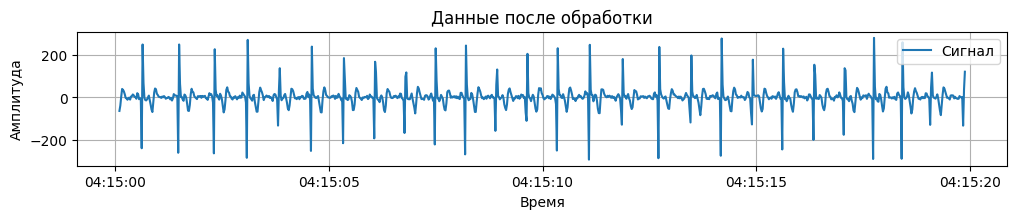

In [ ]:
# Визуализация после обработки
x = filtered_data['Timestamp']
y = filtered_data['COM_Data']

plt.figure(figsize=(12, 8))
plt.subplot(414)
plt.plot(x, y, label="Сигнал")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.title("Данные после обработки")
plt.legend()
plt.grid(True)
plt.show()

Сохранение результатов

In [ ]:
filtered_data.to_csv('com_data/com_fixed_data_20250502_035859_619.csv')